In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats

Datasets were sourced from UC Irvine's Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). 

# Exploratory Data Analysis (EDA)

## For ME: 
since quality is super distributed in the center, this suggests that SVM and NN might required additional tuning, such as adjusting class weights or using techniques like SMOTE to balance the classes

chat gpt's suggested mitigation techniques:
- Resampling: Over-sample the minority class or under-sample the majority class.
- Class Weights: Use algorithms that support class weights to penalize misclassifications of minority classes more.
- Advanced Techniques: Employ techniques such as SMOTE to generate synthetic examples of minority classes.

While the features all have outliers, **free sulfur dioxide and total sulfur dioxide stand out as having significant, widely spread outliers**. These must be dealt with or else, would likely add large amounts of variance. 
Additionally, those two features have a larger range of distributions, whereas other features (e.g, pH, density, alochol) have more compact distributions. 

## FOR ME 
K-Nearest Neighbors (KNN):
- Effect: Sensitive to outliers and feature scales, which can skew distance calculations.
- Mitigation: Remove or cap outliers and normalize the features.

Support Vector Machine (SVM):
- Effect: Outliers can influence the placement of the decision boundary.
- Mitigation: Use robust scaling and consider using SVM with a kernel that handles outliers better (e.g., RBF kernel).

Neural Networks (NN):
- Effect: Outliers can impact the training process and convergence.
- Mitigation: Normalize features and use techniques like dropout and batch normalization.

Steps to Mitigate Effects:
- Outlier Handling:
    - Detection: Use z-scores or IQR to identify outliers.
    - Removal/Capping: Remove extreme outliers or cap them to a certain threshold.
- Normalization/Standardization:
    - Apply Min-Max scaling or StandardScaler to bring all features to a similar scale, which is crucial for distance-based algorithms like KNN and gradient-based algorithms like NN.
- Robust Scaling:
    - Consider using RobustScaler, which scales features according to the interquartile range and is less sensitive to outliers.
- Feature Engineering:
    - Consider transforming skewed features (e.g., using log transformation for highly skewed data).


## FOR ME 
- Remove One of the Correlated Features:
    - Choose to drop one of the correlated features if they provide redundant information.
    - Example: Remove either "Free Sulfur Dioxide" or "Total Sulfur Dioxide."
- Combine Features:
    - Create new features by combining correlated features.
    - Example: Sum of "Free Sulfur Dioxide" and "Total Sulfur Dioxide."
- Principal Component Analysis (PCA):
    - Use PCA to reduce dimensionality and transform correlated features into a set of uncorrelated principal components.
- Regularization Techniques:
    - Apply regularization techniques like Ridge Regression or Lasso that can handle multicollinearity by penalizing the coefficients of correlated features.

## Data Cleaning

- correct outliers, inconsistent data and missing values
- data format standardization, outlier identification and imputation
- data organization and transformation

## Feature Engineering
- improve prediction models by adding features or changing them
- normalizing, scaling, encoding data and creation of new variables
- ensuring features are releavnt and consistent in order to enhance model performance

## Model Building

- correct outliers, inconsistent data and missing values
- data format standardization, outlier identification and imputation
- data organization and transformation

# White Wine

In [3]:
white_wine = pd.read_csv('wine+quality/winequality-white.csv', delimiter=';')

## Data Exploration

In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
shape = white_wine.shape
print(f"White wine datashape has {shape[0]} rows and {shape[1]} columns.")

White wine datashape has 4898 rows and 12 columns.


In [11]:
white_wine.info()
# red_wine.info() #Has the same features and data types as red_wine dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
# Rename column names to remove blank spaces
white_wine.rename(columns={'fixed acidity': 'fixed_acidity',
                     'citric acid':'citric_acid',
                     'volatile acidity':'volatile_acidity',
                     'residual sugar':'residual_sugar',
                     'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [15]:
# Check for null values 
white_wine.isnull().sum() 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
# Check for missing values 
white_wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
white_wine.empty

False

There are no missing, null, or NA values.

In [21]:
white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


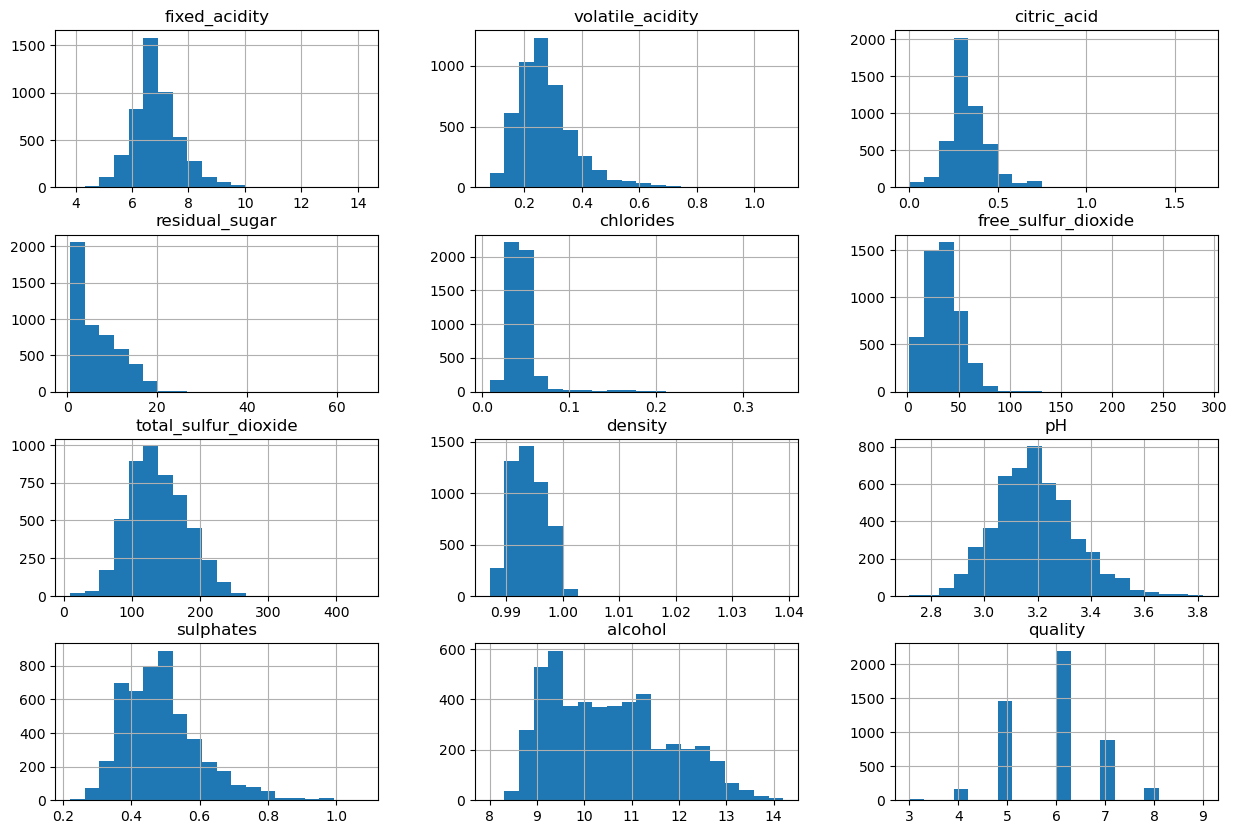

In [23]:
# Use histograms to visualize the distribution of each figure. 
white_wine.hist(bins=20, figsize=(15,10))
plt.show()

In [25]:
# Explore how data is distributed in quality feature
white_wine['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

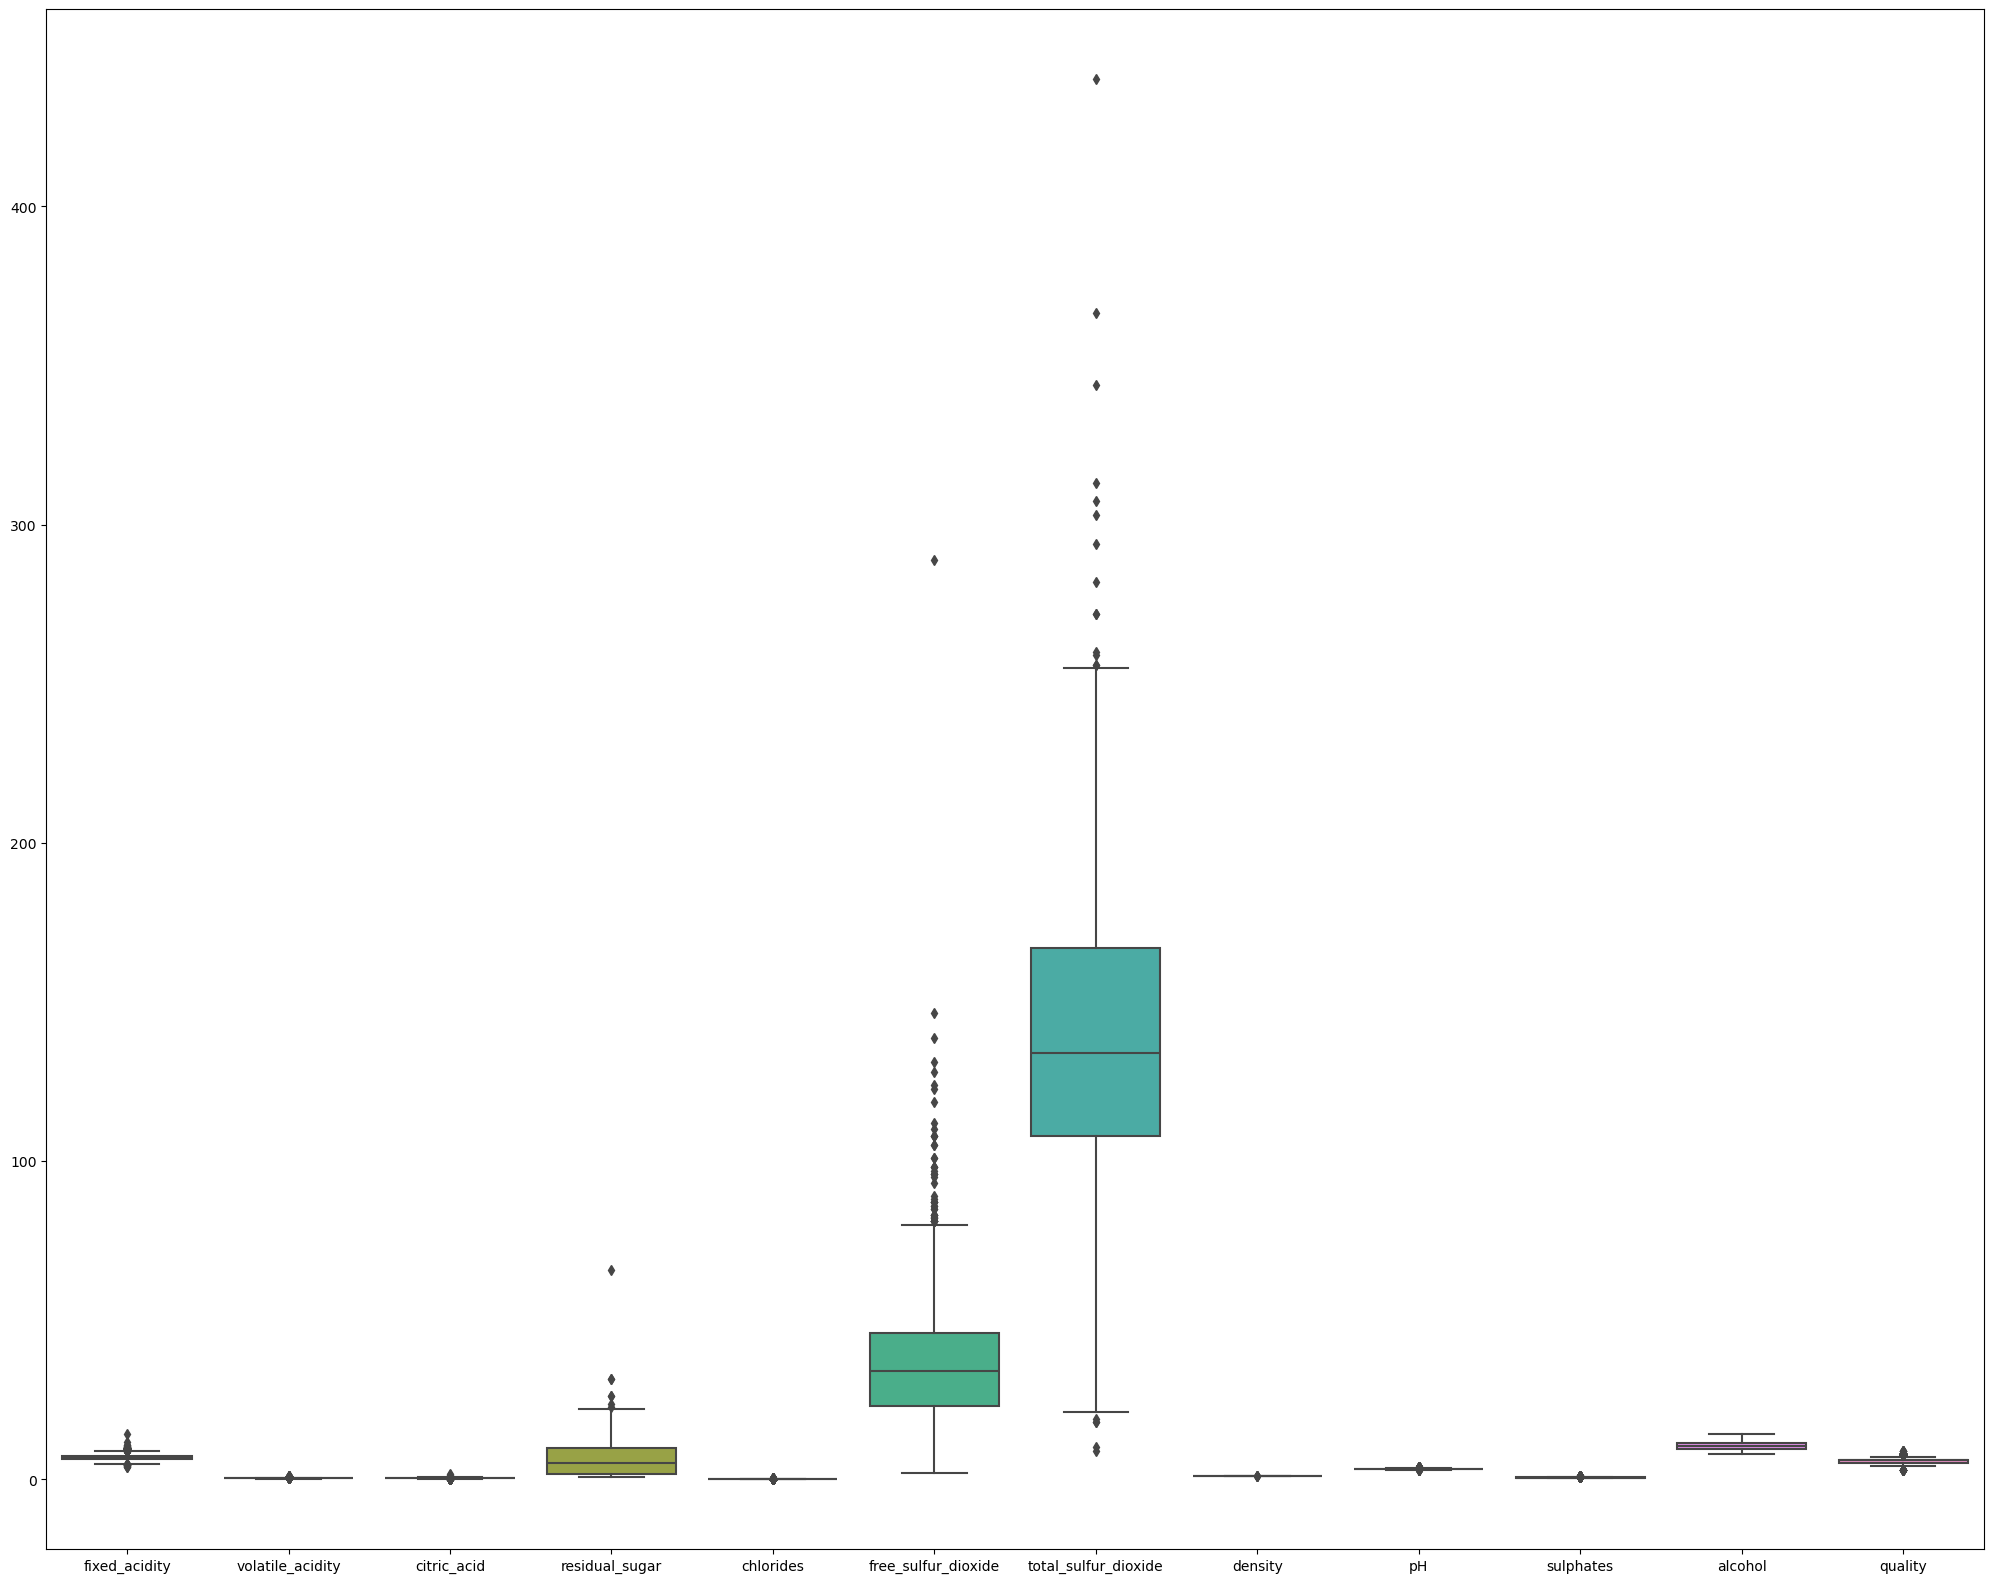

In [27]:
# Box plots - since KNN and SVM can be sensitive to outliers
plt.figure(figsize=(25,20))
sns.boxplot(data=white_wine)
plt.show()

While the features all have outliers, **free sulfur dioxide and total sulfur dioxide stand out as having significant, widely spread outliers**. These must be dealt with or else, would likely add large amounts of variance. 
Additionally, those two features have a larger range of distributions, whereas other features (e.g, pH, density, alochol) have more compact distributions. 

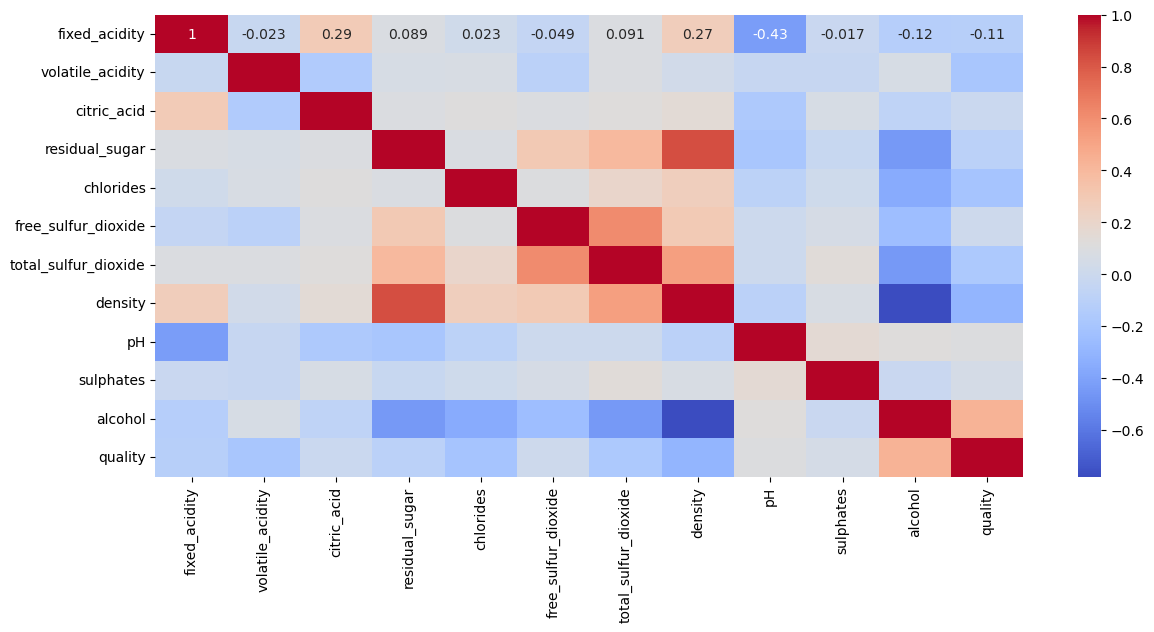

In [29]:
# Correlation matrix for white wine
plt.figure(figsize=(14,6))
correlation = white_wine.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

A correlation matrix was run to determine if there were highly correlated features. These can lead to several issues, including: 
- **Redundacy**: if two features are highly correlated, then one becomes redundant, thus increasing the model's complexity without adding value.
- **Multicollinearity**: when two or more features are highly correlated, leading to issues to estimate individual coefficients of correlated features because their effects on the target variable become difficult to distinguish, make the overall model sensitive to small changes in the data and thus less reliable.
- Can lead to **curse of dimensionality**; removing redundant features can lead to simpler models that are less prone to overfitting and generalize better on unseen data

Notably, some features suggest potential multicollinearity, specifically fixed acidity and citric acid, fixed acidity and density, and total sulfur dioxide and free sulfur dioxide. Additionally, features like alcohol and volatile acidity have strong correlations with quality, indicating their importance for predicting wine quality.

Note: source of information about the effects of a correlation matrix: https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18#:~:text=Explanation%3A%20Correlated%20features%20can%20lead,perform%20better%20on%20unseen%20data.  

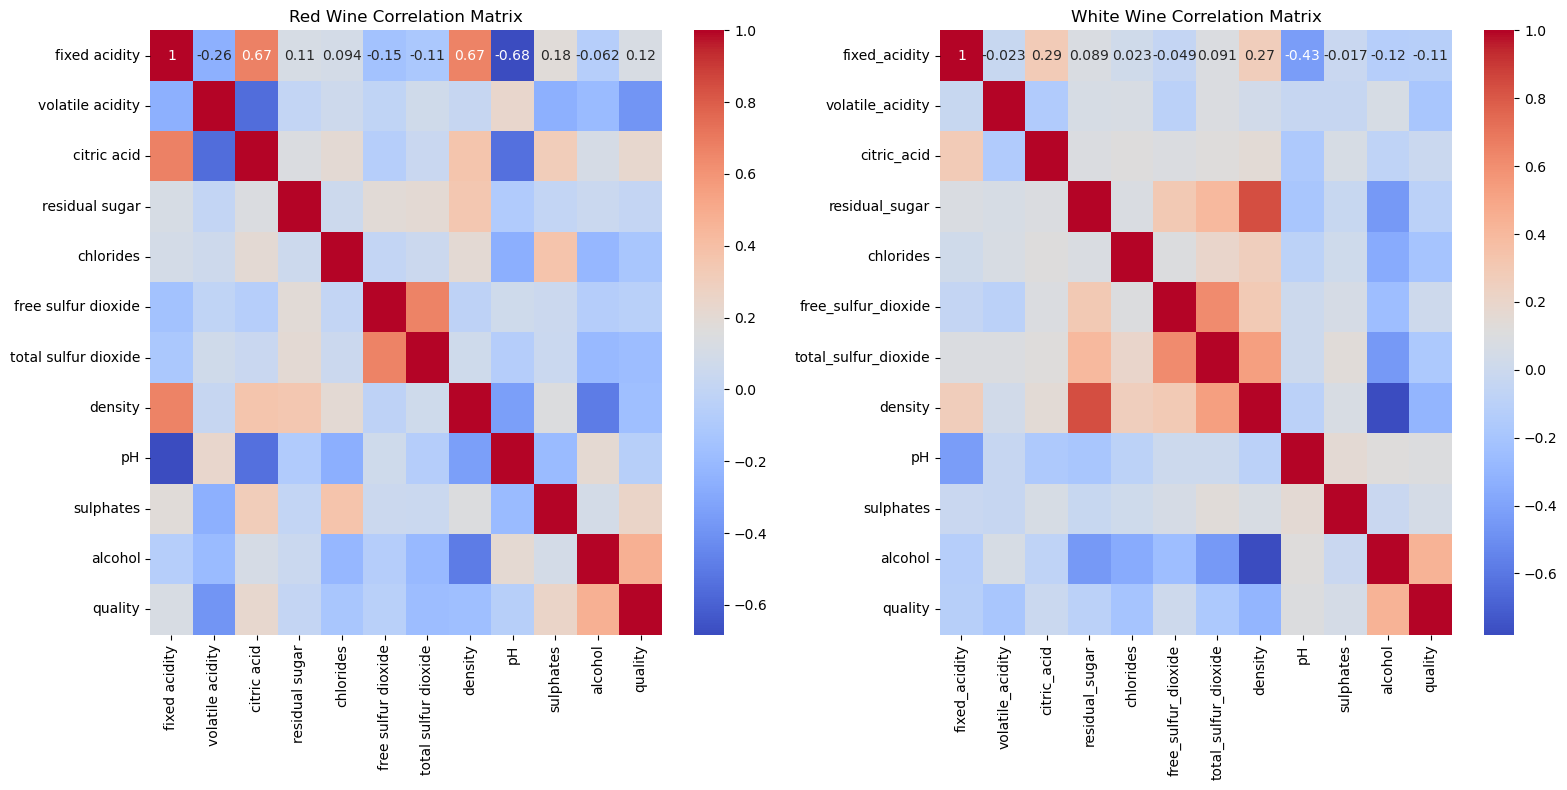

In [125]:
# Side-by-side comparison of correlation matrices between red and white wine
plt.figure(figsize=(16,8))
red_correlation = red_wine.corr()
white_correlation = white_wine.corr()

plt.subplot(1, 2, 1)
sns.heatmap(red_correlation, annot=True, cmap='coolwarm')
plt.title('Red Wine Correlation Matrix')

plt.subplot(1,2,2)
sns.heatmap(white_correlation, annot=True, cmap='coolwarm')
plt.title('White Wine Correlation Matrix')

plt.tight_layout()
plt.show()

## Pre-processing
- **Imputation**: Estimate missing values based on available data) --> since there are no missing values, imputation is not necessary for this dataset.
- **Exclusion**: Exclude data if there's a significant amount missing --> not necessary since there are no missing values
- **Normalizing**: Ensure target variable lies in specific range
- **Scaling**: Adjusts variance of target variable. 

In [31]:
# Determine outliers

# Identify and handle outliers with IQR 
quartile1 = white_wine.quantile(0.25) #value below which 25% of data falls
quartile3 = white_wine.quantile(0.75) #value below which 75% of data falls 
iqr = quartile3 - quartile1 #range for middle 50% of data

# Boundaries for data; if outside these values, they're considered outliers
lower_bound = quartile1 - 1.5 * iqr 
upper_bound = quartile3 + 1.5 * iqr 
outliers = (white_wine < lower_bound) | (white_wine > upper_bound) #Looks at each value in original dataset to determine if it's an outlier

# New dataframe having removed outliers from original dataset 
white_wine_no_outliers = white_wine[~outliers.any(axis=1)] 
# print(white_wine_no_outliers) #3858 rows x 12 columns
# white_wine_no_outliers

# Dataframe containing all outliers from original dataset 
white_wine_outliers = white_wine[outliers.any(axis=1)] 
white_wine_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6
17,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,8
20,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,8
22,6.8,0.26,0.42,1.70,0.049,41.0,122.0,0.99300,3.47,0.48,10.50,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5.3,0.60,0.34,1.40,0.031,3.0,60.0,0.98854,3.27,0.38,13.00,6
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5
4878,6.2,0.53,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.50,4
4886,6.2,0.21,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7


In [33]:
# Visual analysis of values; highlighted ones are outliers 

# Display the outliers with highlights
outliers_highlighted = white_wine_outliers.copy()

# Apply a function to highlight outliers
def highlight_outliers(row):
    return ['background-color: yellow' if is_outlier else '' for is_outlier in row]

highlighted_outliers = outliers_highlighted.style.apply(highlight_outliers, axis=1)
# highlighted_outliers

This function reveals that for the 4898 samples that the white_wine dataset contains, 1040 are outliers (defined as falling outside the whisker range, which was calculated with IQR). If removed, this leaves 3858 non-outlier rows.

In [35]:
# Count of outliers for every feature
outliers.sum()

fixed_acidity           119
volatile_acidity        186
citric_acid             270
residual_sugar            7
chlorides               208
free_sulfur_dioxide      50
total_sulfur_dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
quality                 200
dtype: int64

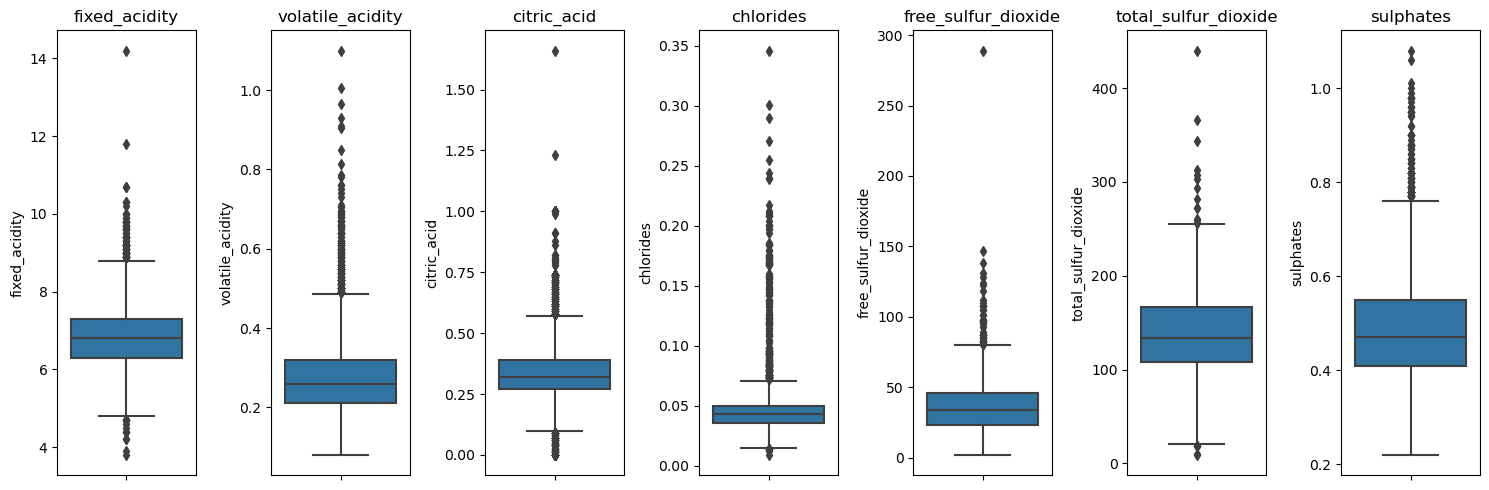

In [37]:
# Closer look at outlier distribution for some features
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates']

plt.figure(figsize=(15,5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=white_wine[feature])
    # plt.title(f'Box plot of {feature}')
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

In [43]:
# outliers for free sulfur dioxide

# Identify and handle outliers with IQR 
quartile1 = white_wine['free_sulfur_dioxide'].quantile(0.25) #value below which 25% of data falls
quartile3 = white_wine['free_sulfur_dioxide'].quantile(0.75) #value below which 75% of data falls 
iqr = quartile3 - quartile1 #range for middle 50% of data

# Boundaries for data; if outside these values, they're considered outliers
lower_bound = quartile1 - 1.5 * iqr 
upper_bound = quartile3 + 1.5 * iqr 
free_outliers = (white_wine['free_sulfur_dioxide'] < lower_bound) | (white_wine['free_sulfur_dioxide'] > upper_bound)

# Outliers removed from dataset 
no_free_sulfur_outliers = white_wine[~free_outliers] 
no_free_sulfur_outliers.shape

#Inspect outliers 
# white_wine_outliers = white_wine[outliers.any(axis=1)] 
# print(white_wine_outliers)

#Free sulfur dioxide outliers
free_sulfur_dioxide_outliers = white_wine[free_outliers]
free_sulfur_dioxide_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


In [57]:
# outliers for total sulfur dioxide

# Identify and handle outliers with IQR 
quartile1 = white_wine['total_sulfur_dioxide'].quantile(0.25) #value below which 25% of data falls
quartile3 = white_wine['total_sulfur_dioxide'].quantile(0.75) #value below which 75% of data falls 
iqr = quartile3 - quartile1 #range for middle 50% of data

# Boundaries for data; if outside these values, they're considered outliers
lower_bound = quartile1 - 1.5 * iqr 
upper_bound = quartile3 + 1.5 * iqr 
total_sulfur_outliers = (white_wine['total_sulfur_dioxide'] < lower_bound) | (white_wine['total_sulfur_dioxide'] > upper_bound)

# Outliers removed from dataset 
no_total_sulfur_outliers = white_wine[~total_sulfur_outliers] 
no_total_sulfur_outliers.shape

(4879, 12)

In [63]:
print(free_sulfur_dioxide_outliers.shape)

(50, 12)


In [145]:
print(no_total_sulfur_outliers.shape)

(4879, 12)


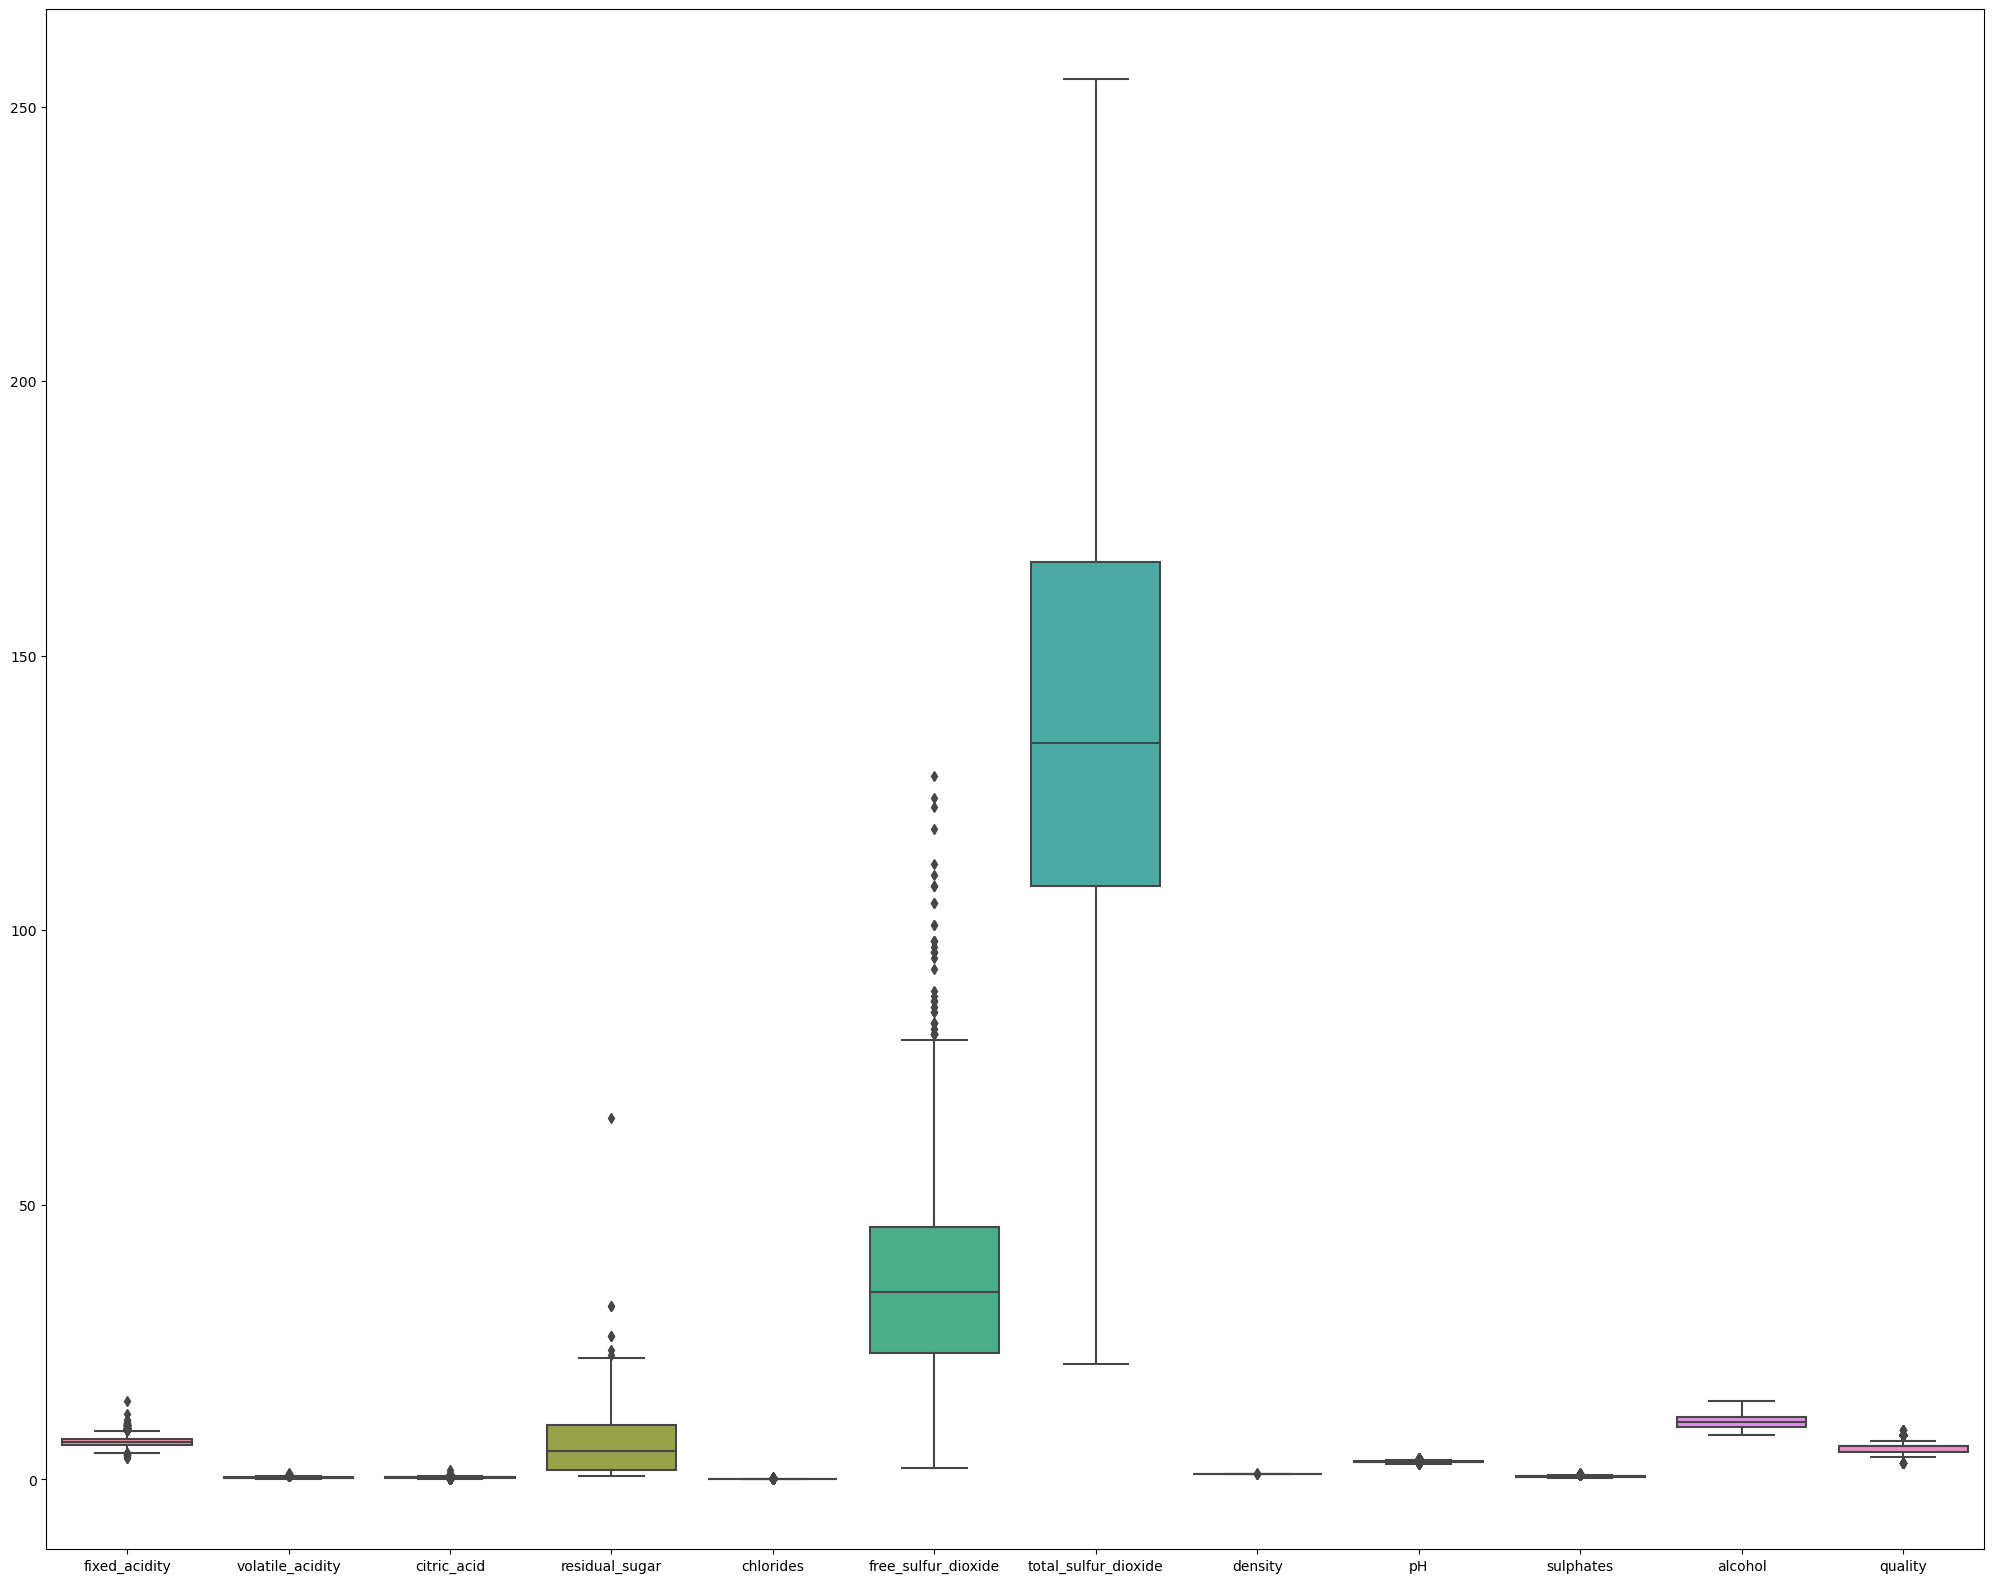

In [65]:
# Box plots - since KNN and SVM can be sensitive to outliers
plt.figure(figsize=(25,20))
sns.boxplot(data=no_total_sulfur_outliers)
plt.show()

We determined IQR to be a better method for dealing with outliers for this dataset after considering the non-normal distribution and skewness in the data. 

Source: https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

## Splitting the Data
1. Split into testing and training sets
2. Handle the outliers
3. Normalize features (not standardize! it's better to use normalization for KNN and NN; SVM for both) 
4. Train classifier
5. Predict on test set
6. Evaluate using accuracy, confusion matrix and classification report
7. Fine-Tune model using GridSearchCV for hyperparameter tuning
8. Evaluate best model on the test set 

## Feature Selection
- **Improved Model Performance** -- Reducing the number of irrelevant or redundant features can improve the accuracy of the model by focusing on the most informative features
- **Reduced Overfitting** -- Fewer features can lead to a simpler model that is less likely to overfit, especially when the number of features is large relative to the number of training samples.
- **Faster Computation** -- Training times and computational costs are reduced when the model has fewer features to process.
- **Enhanced Interpretability** -- A model with fewer features is easier to interpret and understand.
  
Code reference: https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning 

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [194]:
# Separate features and target variable
feature_variables = white_wine.drop('quality', axis=1) #x
target_variable = white_wine['quality'] #y

# Split data into 30/70, test/train sets 
X_train, X_test, y_train, y_test = train_test_split(feature_variables, target_variable, test_size=0.3, random_state=42)

# split data into 20/80 for validation
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [196]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('scaling', StandardScaler()),
    ('classification', KNeighborsClassifier())
])

In [198]:
param_grid = {
    'feature_selection__k': [2, 3, 5, 7, 10],  # Number of features to select
    'classification__n_neighbors': [3, 5, 7, 9],  # Different values for K in KNN
    'classification__weights': ['uniform', 'distance'],  # KNN weights
    'classification__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [200]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [57]:
import time

In [202]:
# Runtime 
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

In [204]:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

print(f"Grid search runtime: {runtime:.2f} seconds")

Best parameters: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score: 0.6356489540550317
Test set score: 0.6755102040816326
Grid search runtime: 33.47 seconds
Test set accuracy: 0.6755102040816326


In [218]:
from sklearn.metrics import accuracy_score

In [220]:
# Predict labels for the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.6755102040816326


In [206]:
from sklearn.metrics import precision_score

In [208]:
# Predict labels for the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision on test set:", precision)

Precision on test set: 0.6707144258412211


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [210]:
from sklearn.metrics import recall_score

In [212]:
# Predict labels for the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute recall score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall on test set:", recall)

Recall on test set: 0.6755102040816326


In [214]:
from sklearn.metrics import f1_score

In [216]:
# Predict labels for the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score on test set:", f1)

F1 score on test set: 0.6677956024243591


In [ ]:
wine_exploration copy.ipynb

In [81]:
results = pd.DataFrame(grid_search.cv_results_)

In [85]:
results.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classification__n_neighbors,param_feature_selection__k,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.007531,0.001093,0.033926,0.004743,6.000000,5.400000,0.560811,0.561237,0.551980,0.540000,0.550024,0.552811,0.015062,60.166667
std,0.002056,0.002500,0.022391,0.009093,2.245444,2.882576,0.050784,0.055150,0.048158,0.045204,0.051450,0.048335,0.004801,34.784652
min,0.006075,0.000021,0.004464,0.000020,3.000000,2.000000,0.472303,0.456268,0.457726,0.443796,0.445255,0.465576,0.002277,1.000000
25%,0.006599,0.000173,0.011103,0.000694,4.500000,3.000000,0.520773,0.520408,0.518950,0.509489,0.519343,0.520851,0.011556,30.500000
50%,0.007033,0.000459,0.038022,0.001516,6.000000,5.000000,0.546647,0.555394,0.540816,0.524088,0.543796,0.535440,0.015728,60.500000
75%,0.007765,0.001103,0.048387,0.005273,7.500000,7.000000,0.612245,0.618076,0.598397,0.585766,0.590511,0.606833,0.017961,90.250000
max,0.023992,0.021386,0.094837,0.052518,9.000000,10.000000,0.653061,0.642857,0.635569,0.610219,0.668613,0.635649,0.025190,120.000000


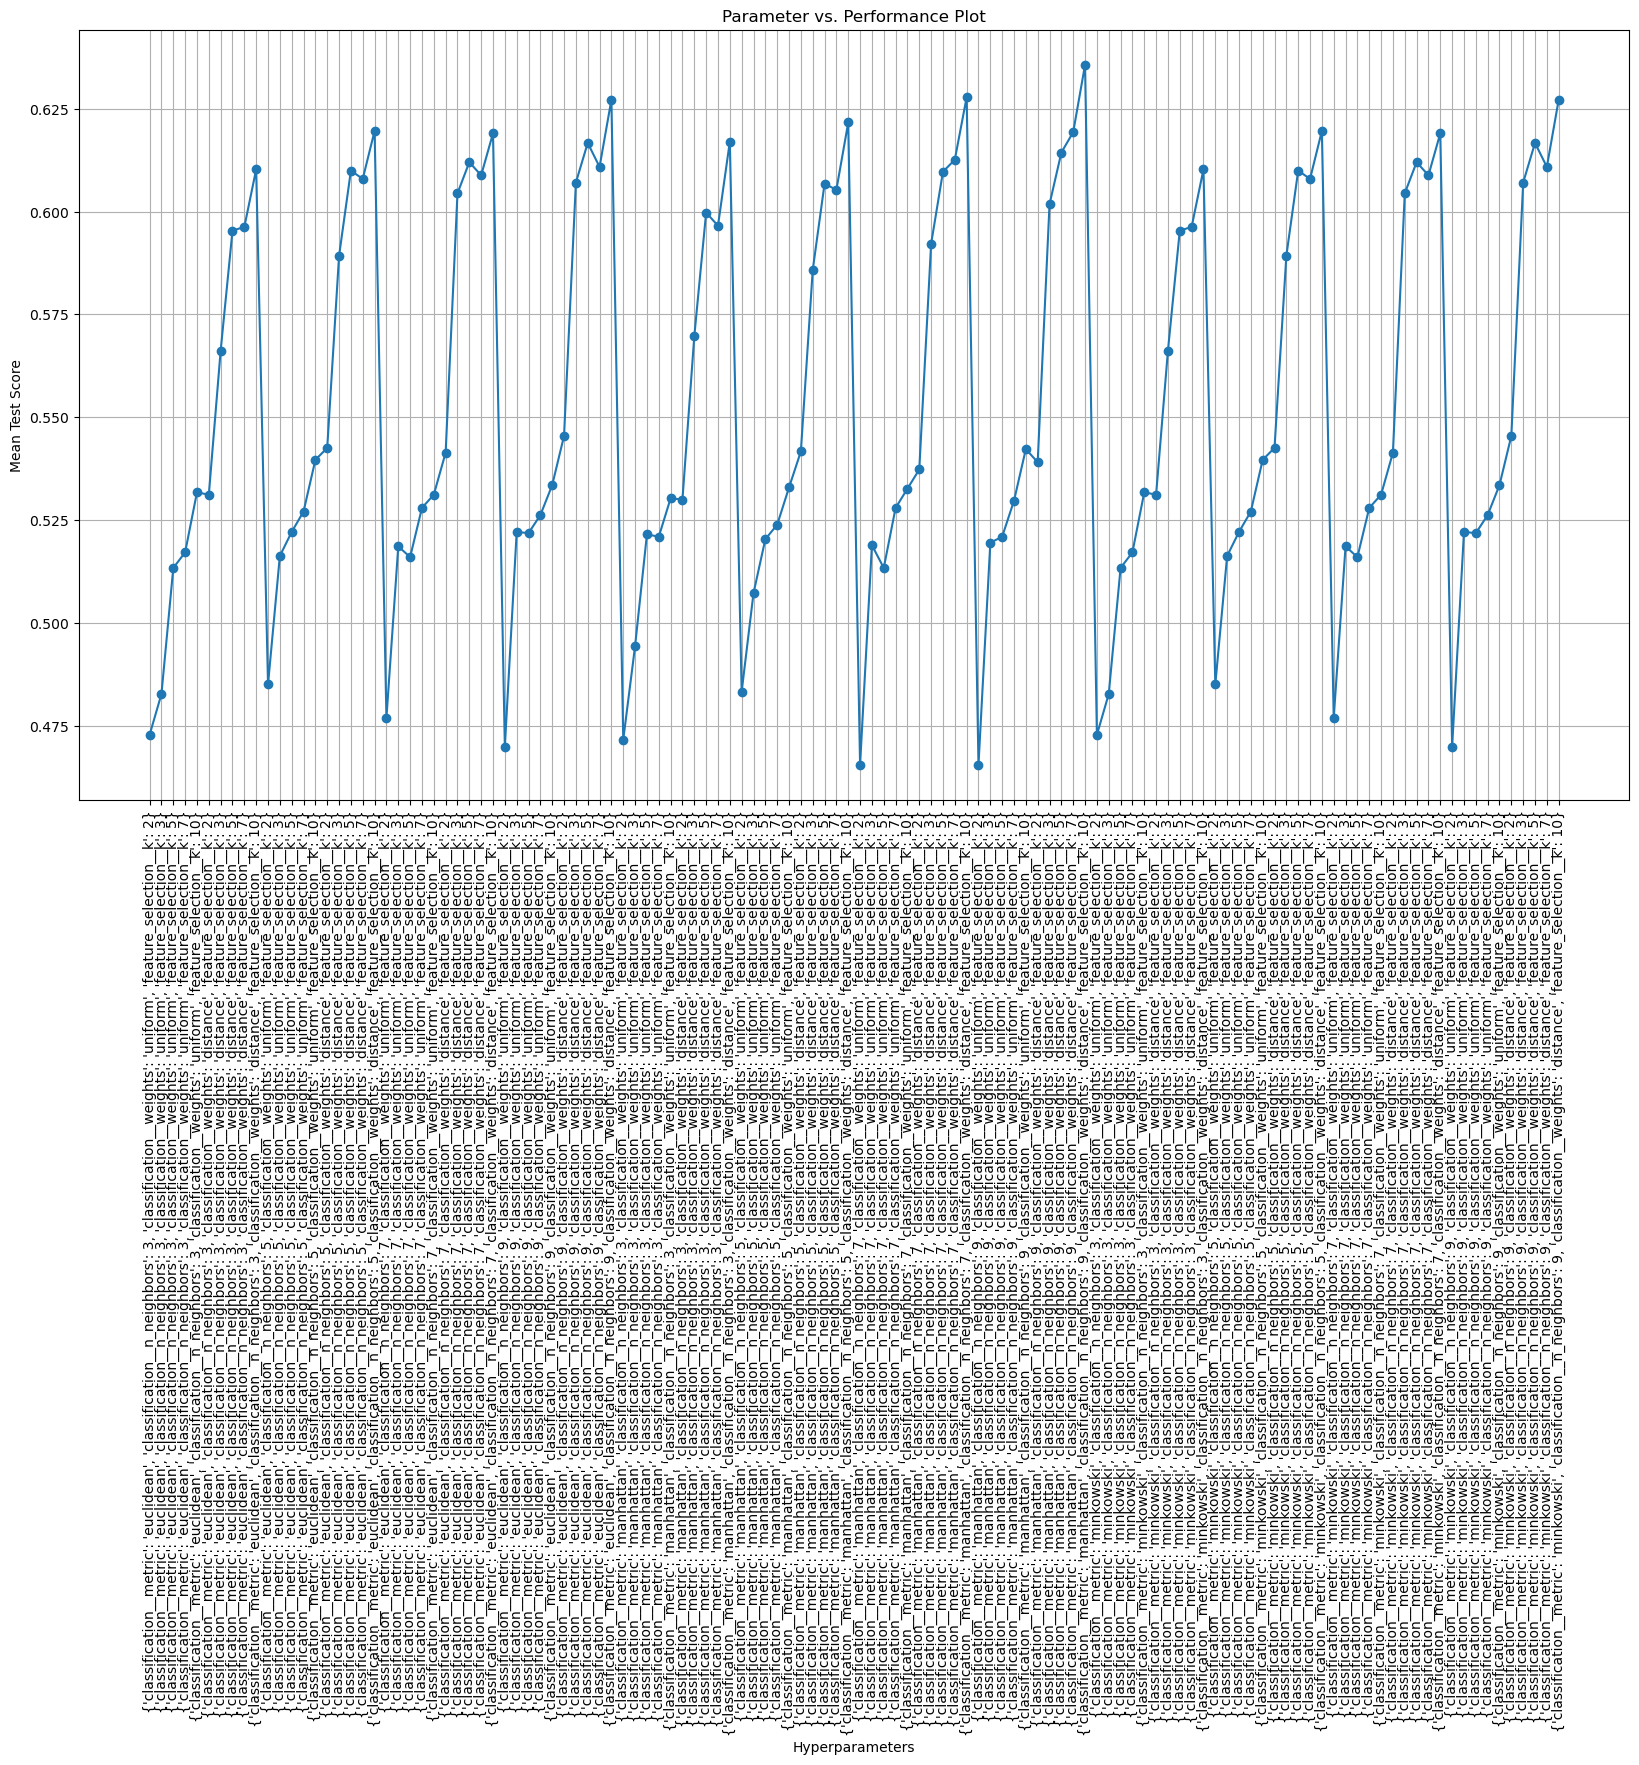

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the hyperparameters and mean test scores from the results
params = results['params']
mean_test_scores = results['mean_test_score']

# Create a parameter vs. performance plot
plt.figure(figsize=(20, 10))
plt.plot(range(len(params)), mean_test_scores, marker='o', linestyle='-')
plt.xticks(range(len(params)), [str(param) for param in params], rotation=90)
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Test Score')
plt.title('Parameter vs. Performance Plot')
plt.grid(True)
# plt.tight_layout()
plt.show()

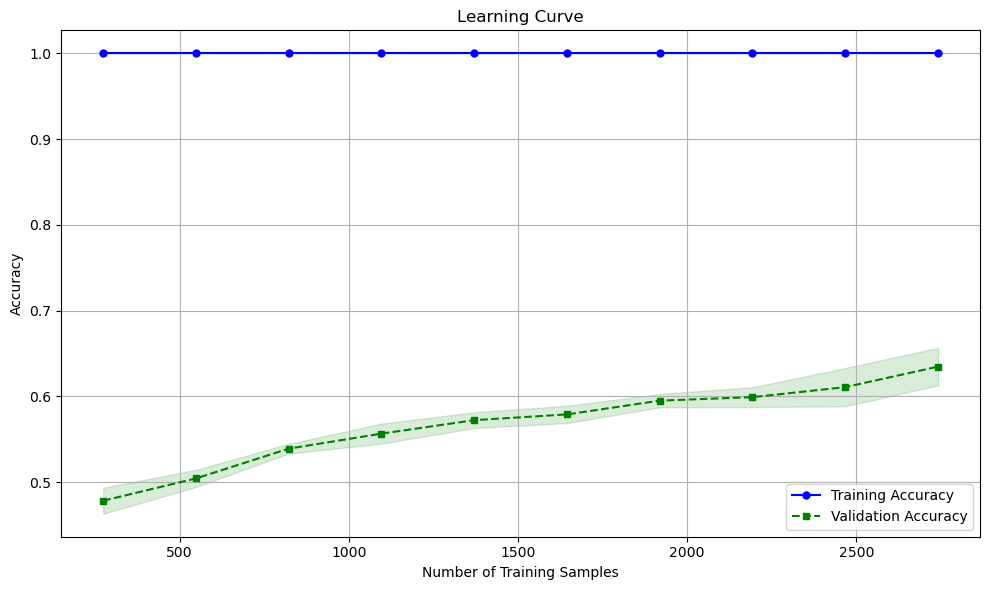

In [75]:
from sklearn.model_selection import learning_curve

# Define the estimator and parameter settings
estimator = grid_search.best_estimator_
param_range = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Other KNN Metrics

Since accuracy as a scoring metric is suitable for balanced datasets (where all classes are equally important), it's important to investigate how other metrics will affect this data, considering that many features have skewed distributions.

In [167]:
# Run KNN on precision metric
knn_precision_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision_micro')

# Runtime 
start_time = time.time()
knn_precision_grid_search.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

best_model = knn_precision_grid_search.best_estimator_
print("Best parameters:", knn_precision_grid_search.best_params_)
print("Best cross-validation score:", knn_precision_grid_search.best_score_)

test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

print(f"Grid search runtime: {runtime:.2f} seconds")

Best parameters: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score: 0.6356489540550317
Test set score: 0.6755102040816326
Grid search runtime: 32.55 seconds


In [169]:
# Run KNN on recall metric
knn_recall_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall_micro')

# Runtime 
start_time = time.time()
knn_recall_grid_search.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

best_model = knn_recall_grid_search.best_estimator_
print("Best parameters:", knn_recall_grid_search.best_params_)
print("Best cross-validation score:", knn_recall_grid_search.best_score_)

test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

print(f"Grid search runtime: {runtime:.2f} seconds")

Best parameters: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score: 0.6356489540550317
Test set score: 0.6755102040816326
Grid search runtime: 29.73 seconds


In [171]:
# Run KNN on f1 metric
knn_f1_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_micro')

# Runtime 
start_time = time.time()
knn_f1_grid_search.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

best_model = knn_f1_grid_search.best_estimator_
print("Best parameters:", knn_f1_grid_search.best_params_)
print("Best cross-validation score:", knn_f1_grid_search.best_score_)

test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

print(f"Grid search runtime: {runtime:.2f} seconds")

Best parameters: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score: 0.6356489540550317
Test set score: 0.6755102040816326
Grid search runtime: 31.18 seconds


### Stratified K-Fold Cross-Validation for KNN

Difference between this and above:
- (Above) **Train-test split with cross validation** -- Data was split into training/test sets. CV was used on the training set to tune the hyperparameters and assess the model performance. Then the best model was evaluated on the separate test set.

- (Below) **CV ONLY** -- CV was done on the entire dataset. Each fold was both a training and avalidation set during different iterations of the CV process. Then, the performance was averaged across multiple folds to provide an estimate of how well the model can generalized.


ABOVE: Since the test set remained the same (regardless of scoring metric used), this might help explain why the cv-score and test-set score was the same across.

In [175]:
from sklearn.model_selection import StratifiedKFold

In [177]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [183]:
# Run KNN on accuracy metric, stratified k folds
knn_accuracy_stratified_grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='accuracy')

# Runtime 
start_time = time.time()
knn_accuracy_stratified_grid_search.fit(feature_variables, target_variable)
end_time = time.time()
runtime = end_time - start_time

best_model_stratified = knn_accuracy_stratified_grid_search.best_estimator_
print("Best parameters with stratified k-fold:", knn_accuracy_stratified_grid_search.best_params_)
print("Best cross-validation score with stratified k-fold:", knn_accuracy_stratified_grid_search.best_score_)

print(f"Grid search runtime with stratified k-fold: {runtime:.2f} seconds")

Best parameters with stratified k-fold: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score with stratified k-fold: 0.6608776135581913
Grid search runtime with stratified k-fold: 45.14 seconds


In [188]:
# Run KNN on precision metric, stratified k folds
knn_precision_stratified_grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='precision_micro')

# Runtime 
start_time = time.time()
knn_precision_stratified_grid_search.fit(feature_variables, target_variable)
end_time = time.time()
runtime = end_time - start_time

best_model_stratified = knn_precision_stratified_grid_search.best_estimator_
print("Best parameters with stratified k-fold:", knn_precision_stratified_grid_search.best_params_)
print("Best cross-validation score with stratified k-fold:", knn_precision_stratified_grid_search.best_score_)

print(f"Grid search runtime with stratified k-fold: {runtime:.2f} seconds")

Best parameters with stratified k-fold: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score with stratified k-fold: 0.6608776135581913
Grid search runtime with stratified k-fold: 65.01 seconds


In [189]:
# Run KNN on recall metric, stratified k folds
knn_recall_stratified_grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='recall_micro')

# Runtime 
start_time = time.time()
knn_recall_stratified_grid_search.fit(feature_variables, target_variable)
end_time = time.time()
runtime = end_time - start_time

best_model_stratified = knn_recall_stratified_grid_search.best_estimator_
print("Best parameters with stratified k-fold:", knn_recall_stratified_grid_search.best_params_)
print("Best cross-validation score with stratified k-fold:", knn_recall_stratified_grid_search.best_score_)

print(f"Grid search runtime with stratified k-fold: {runtime:.2f} seconds")

Best parameters with stratified k-fold: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score with stratified k-fold: 0.6608776135581913
Grid search runtime with stratified k-fold: 66.94 seconds


In [190]:
# Run KNN on recall metric, stratified k folds
knn_f1_stratified_grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='f1_micro')

# Runtime 
start_time = time.time()
knn_f1_stratified_grid_search.fit(feature_variables, target_variable)
end_time = time.time()
runtime = end_time - start_time

best_model_stratified = knn_f1_stratified_grid_search.best_estimator_
print("Best parameters with stratified k-fold:", knn_f1_stratified_grid_search.best_params_)
print("Best cross-validation score with stratified k-fold:", knn_f1_stratified_grid_search.best_score_)

print(f"Grid search runtime with stratified k-fold: {runtime:.2f} seconds")

Best parameters with stratified k-fold: {'classification__metric': 'manhattan', 'classification__n_neighbors': 9, 'classification__weights': 'distance', 'feature_selection__k': 10}
Best cross-validation score with stratified k-fold: 0.6608776135581913
Grid search runtime with stratified k-fold: 67.85 seconds


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

## OTHER

In [132]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(white_wine.drop('quality', axis=1), white_wine['quality'], random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (3673, 11) (3673,)
Testing set shape:  (1225, 11) (1225,)


In [134]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [136]:
# Get the two best(k = 5) features using the SelectKBest method
ft = SelectKBest(chi2, k = 5).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [5.34437870e+00 9.60922011e+00 7.03293081e-01 3.84364462e+02
 2.09678636e+00 6.67361589e+02 2.33618709e+03 3.74614326e-03
 3.87059148e-01 4.60245109e-01 1.16959234e+02]
Columns:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


The above uses the chi-square test to determine if there's a significant difference between the observed frequency of a categorical variable and the expected frequency based on the assumption of independence.

The below uses the ANOVA test to determine the f-value, which measures the statistical significance of the difference between the means of two or more groups. 

In [142]:
ft = SelectKBest(f_classif, k= 5).fit(X_train, y_train)
print(f'Column: Score: {X_train.columns}{ft.scores_}')
# print('Columns: ', X_train.columns)

Column: Score: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')[  9.08190484  47.55427819   2.75534225  16.6821116   34.56417998
  14.00375228  31.82662277  81.57186831   9.17774671   2.79187939
 173.67471297]


Based on the results from both statistical tests, it looks like in descending order, the most important features are: 
- alcohol (173)
- density (81)
- volatile acidity (47)
- chlories (34)
- total_sulfur_dioxide (31)
- residual sugar (16)
- free_sulfur_dioxide (14)
- pH (9.1)
- fixed acidity (9.08)
- sulphases (2.79)
- citric acid (2.75)

## Standardize the Data

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
feature_variables = white_wine.drop('quality', axis=1) #x
target_variable = white_wine['quality'] #y

# Standardize the features 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(feature_variables) #x_scaled
#Note: don't have to scale target variable because it's discrete (already encoded numerically) 

### Splitting Data

In [ ]:
# Split data into 20/80, test/train sets 
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target_variable, train_size=0.8, test_size=0.2, random_state=42)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### K-Nearest Neighbors (KNN)

In [49]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn, features_scaled, target_variable, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("KNN Cross-Validation Mean Accuracy:", cv_scores_knn.mean())

KNN Cross-Validation Scores: [0.43877551 0.43061224 0.49081633 0.47803882 0.51174668]
KNN Cross-Validation Mean Accuracy: 0.4699979154072252


In [51]:
from sklearn.svm import SVC

### Support Vector Machine (SVM)

In [53]:
# SVM model
svm = SVC(kernel='linear')

# Perform cross-validation
cv_scores_svm = cross_val_score(svm, features_scaled, target_variable, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Cross-Validation Mean Accuracy:", cv_scores_svm.mean())

SVM Cross-Validation Scores: [0.47857143 0.49693878 0.53367347 0.51378958 0.53319714]
SVM Cross-Validation Mean Accuracy: 0.5112340789226825


### Neural Network (NN)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

2024-05-31 17:50:04.911257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
# Function to create the neural network model
def create_nn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(features_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes for wine quality scores from 0 to 9
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
nn = KerasClassifier(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=1)

# Perform cross-validation
cv_scores_nn = cross_val_score(nn, features_scaled, target_variable, cv=5, scoring='accuracy')
print("NN Cross-Validation Scores:", cv_scores_nn)
print("NN Cross-Validation Mean Accuracy:", cv_scores_nn.mean())


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4151 - loss: 1.6310
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5655 - loss: 1.1085
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5615 - loss: 1.0620
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5857 - loss: 1.0303
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5723 - loss: 1.0293
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5828 - loss: 1.0295
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5887 - loss: 0.9856
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.9574
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 0.9752
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5871 - loss: 0.9762
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 0.9485
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4379 - loss: 1.6222
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5596 - loss: 1.1349
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5748 - loss: 1.0641
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5688 - loss: 1.0531
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 1.0184
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5623 - loss: 1.0329
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.9921
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5832 - loss: 0.9979
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5867 - loss: 0.9916
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6069 - loss: 0.9772
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.9764
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4016 - loss: 1.7810
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5320 - loss: 1.1683
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5415 - loss: 1.0942
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5546 - loss: 1.0661
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5683 - loss: 1.0414
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5690 - loss: 1.0170
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5696 - loss: 1.0165
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5801 - loss: 1.0102
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 0.9874
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5874 - loss: 0.9751
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 0.9825
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4678 - loss: 1.6408
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5335 - loss: 1.1378
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 1.0840
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5603 - loss: 1.0380
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5597 - loss: 1.0316
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5952 - loss: 0.9804
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5826 - loss: 0.9863
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5776 - loss: 0.9876
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 0.9662
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5921 - loss: 0.9678
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 0.9301
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4257 - loss: 1.6267
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5421 - loss: 1.1277
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.5486 - loss: 1.0941
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5765 - loss: 1.0638
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5535 - loss: 1.0597
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5556 - loss: 1.0341
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5721 - loss: 1.0309
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 1.0181
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5953 - loss: 0.9938
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5911 - loss: 0.9843
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5823 - loss: 0.9850
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

## Plotting Results

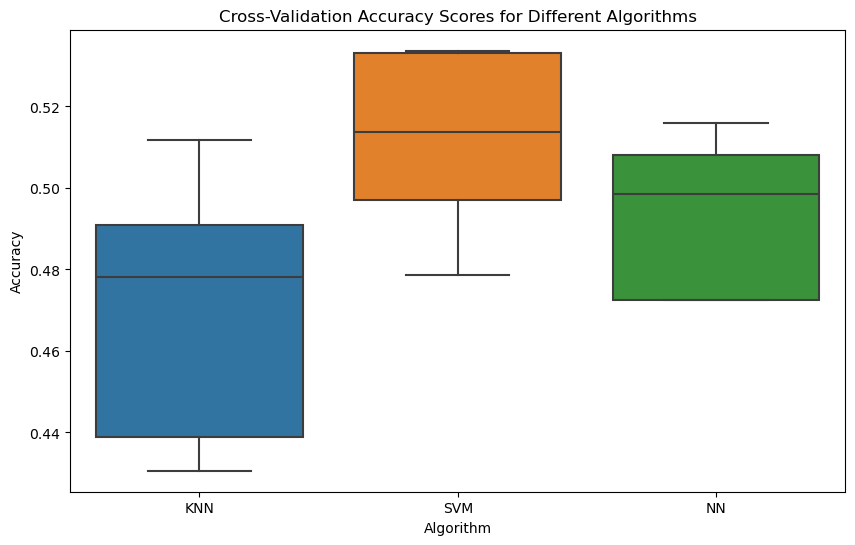

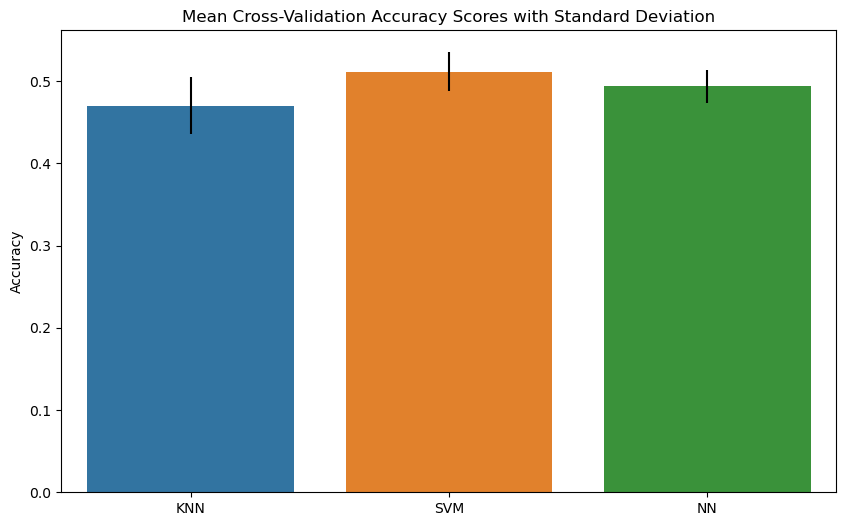

In [59]:
results_df = pd.DataFrame({
    'KNN' : cv_scores_knn,
    'SVM' : cv_scores_svm, 
    'NN' : cv_scores_nn, })

results_df_melted = results_df.melt(var_name='Algorithm', value_name='Accuracy')

# Boxplot to visualize the cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Algorithm', y='Accuracy', data=results_df_melted)
plt.title('Cross-Validation Accuracy Scores for Different Algorithms')
plt.show()

# Bar plot to visualize mean accuracy scores with error bars
mean_scores = results_df.mean()
std_scores = results_df.std()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values, yerr=std_scores.values)
plt.title('Mean Cross-Validation Accuracy Scores with Standard Deviation')
plt.ylabel('Accuracy')
plt.show()

In [69]:
from sklearn.model_selection import learning_curve

In [71]:
def plot_learning_curve(estimator, title, X, y, cv, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

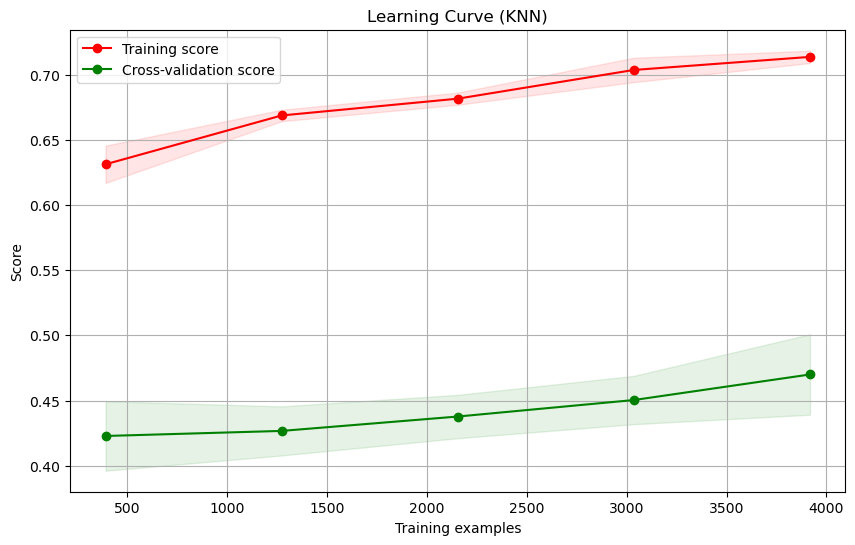

In [73]:
# Plot KNN learning curves 
plot_learning_curve(knn, "Learning Curve (KNN)", features_scaled, target_variable, cv=5)
plt.show()

Model's performance on the unseen data (i.e, the cross-validation score) isn't as good as the training data. 

Since the training score is consistently higher than the cross validation score (increases as the number of training examples increase), it suggests that the model is performing well on the training data; that and the large gap between the training and cross-validation scores imply **overfitting**. 

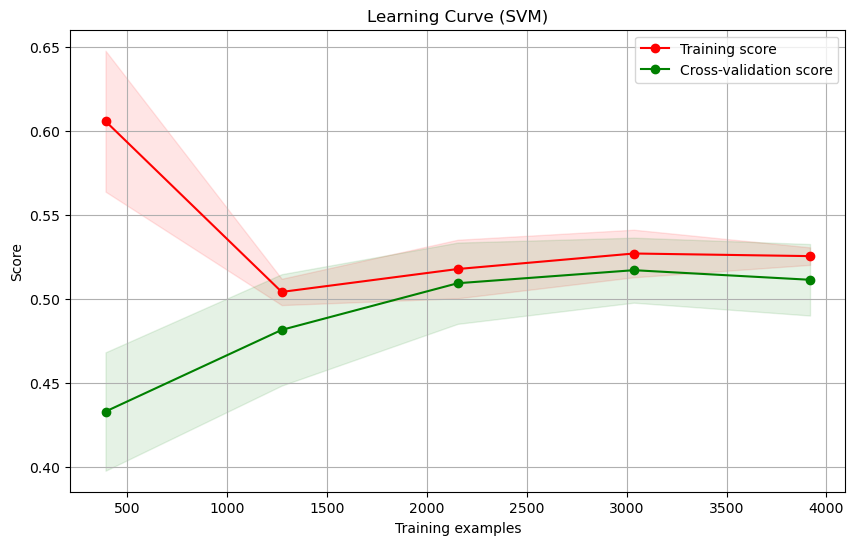

In [75]:
# Plot SVM learning curves
plot_learning_curve(svm, "Learning Curve (SVM)", features_scaled, target_variable, cv=5)
plt.show()

Model is initially overfitting the training data but generalizes better as more data is added.

Compared to KNN, the model generalizes better overall, which suggests a more balance model. 

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0982 - loss: 2.3706
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3115 - loss: 1.9107 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4467 - loss: 1.6513 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4880 - loss: 1.5040
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4599 - loss: 1.4322
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4873 - loss: 1.3396 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 1.3044 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5714 - loss: 1.1911
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5651 - loss: 1.1311 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5284 - loss: 1.2245 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5122 - loss: 1.2196
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1719 - loss: 2.3404   
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4790 - loss: 1.4193
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5308 - loss: 1.2777
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5229 - loss: 1.1996
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5433 - loss: 1.1380
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5544 - loss: 1.1325
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5691 - loss: 1.0924
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5255 - loss: 1.1131
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5787 - loss: 1.0831
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 1.0489
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5646 - loss: 1.0672
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 -

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3667 - loss: 1.8313
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 1.2396
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5441 - loss: 1.1427
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5593 - loss: 1.1189
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5620 - loss: 1.0756
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5638 - loss: 1.0480
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5871 - loss: 1.0374
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5614 - loss: 1.0527
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5759 - loss: 1.0356
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5880 - loss: 1.0117
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5925 - loss: 1.0047
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5886 - loss: 0.9850


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2968 - loss: 1.9391
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 1.1660
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 1.1194
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5464 - loss: 1.0992
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5565 - loss: 1.0679
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5640 - loss: 1.0436
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 1.0396
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5721 - loss: 1.0282
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5815 - loss: 1.0173
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5792 - loss: 1.0234
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5731 - loss: 1.0114
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5930 - loss: 0.9757


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3563 - loss: 1.7888
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5560 - loss: 1.1604
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 1.0654
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5858 - loss: 1.0315
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 1.0137
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.0144
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5622 - loss: 1.0035
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.9718
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6029 - loss: 0.9638
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.9688
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5989 - loss: 0.9522
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1954 - loss: 2.2138
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4595 - loss: 1.7826 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 1.4802 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 1.2660 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5711 - loss: 1.1991 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 1.0976 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 1.0702 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 1.0155 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 1.0038 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - loss: 0.9867 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6158 - loss: 0.9922 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - los

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2687 - loss: 2.1759
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4370 - loss: 1.4389
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 1.3114
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 1.1693
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 1.1014
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5355 - loss: 1.1283
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 1.1098
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 1.0681
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5638 - loss: 1.0879
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5780 - loss: 1.0190
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 1.0262
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 1.0347


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3872 - loss: 1.8251 
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.2333
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5410 - loss: 1.1624
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 1.1267
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5486 - loss: 1.1029
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.0822
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 1.0416
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5923 - loss: 1.0234
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5733 - loss: 1.0299
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6192 - loss: 0.9762
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5996 - loss: 0.9789
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.9672

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3112 - loss: 1.8993
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5509 - loss: 1.1921
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 1.1308
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 1.0986
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5401 - loss: 1.0878
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5642 - loss: 1.0659
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 1.0323
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5710 - loss: 1.0312
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5792 - loss: 0.9995
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5918 - loss: 0.9895
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 0.9776
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.9820


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4209 - loss: 1.7007
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.1539
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.0769
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 1.0552
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5799 - loss: 1.0292
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5928 - loss: 0.9896
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.9903
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5993 - loss: 0.9991
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.9939
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 0.9814
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6098 - loss: 0.9449
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0894 - loss: 2.3070
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3480 - loss: 1.9214 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 1.5747 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5183 - loss: 1.3435 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5134 - loss: 1.2571 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 1.1218 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 1.1413 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6104 - loss: 1.0605  
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 1.0425  
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 1.0179 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.9464 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6114 - l

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3220 - loss: 1.8959
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 1.3269
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5183 - loss: 1.2339
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 1.1592
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 1.1125
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 1.1300
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 1.0705
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 1.0329
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5720 - loss: 1.0696
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 1.0505
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5933 - loss: 0.9994
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5917 - loss: 1.0246


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3956 - loss: 1.8346
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 1.2384
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5009 - loss: 1.1809
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5420 - loss: 1.1210
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 1.1283
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5497 - loss: 1.0853
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5542 - loss: 1.0593
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5601 - loss: 1.0485
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 1.0557
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5691 - loss: 1.0139
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5713 - loss: 1.0199
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 1.0018


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3934 - loss: 1.7270
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 1.1948
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5281 - loss: 1.1203
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 1.1115
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5431 - loss: 1.0721
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5354 - loss: 1.0810
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5605 - loss: 1.0558
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 1.0446
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 1.0547
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5750 - loss: 1.0341
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 1.0375
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5599 - loss: 1.0067


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4199 - loss: 1.6283
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5383 - loss: 1.1091
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5583 - loss: 1.0677
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5413 - loss: 1.0522
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - loss: 1.0328
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5558 - loss: 1.0225
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 1.0098
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5812 - loss: 0.9803
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5757 - loss: 0.9971
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5905 - loss: 0.9814
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 0.9836
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2031 - loss: 2.1560
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4097 - loss: 1.7927 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4725 - loss: 1.4877 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 1.2967 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5328 - loss: 1.2343 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.1548 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5689 - loss: 1.1035 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 1.1091 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 1.0209 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6029 - loss: 1.0385 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 0.9468 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - los

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3050 - loss: 2.0384
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4695 - loss: 1.4066
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4762 - loss: 1.3044
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 1.1735
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5232 - loss: 1.1216
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5296 - loss: 1.1306
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5554 - loss: 1.0699
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 1.0363
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5721 - loss: 1.0567
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5423 - loss: 1.0670 
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 1.0091
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5838 - loss: 1.0232

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3128 - loss: 1.9416
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 1.2380
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 1.1606
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 1.1468
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5516 - loss: 1.0844
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5680 - loss: 1.0686
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 1.0479
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5728 - loss: 1.0405
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 1.0167
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5849 - loss: 1.0289
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 1.0242
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.0022


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3490 - loss: 1.7766
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 1.1782
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 1.1010
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 1.0839
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5587 - loss: 1.0741
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5755 - loss: 1.0234
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 1.0409
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5861 - loss: 1.0025
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5727 - loss: 1.0106
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5960 - loss: 0.9736
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5891 - loss: 0.9880
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5757 - loss: 0.9982


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3925 - loss: 1.6653
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 1.1270
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 1.0650
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 1.0504
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5812 - loss: 1.0237
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 1.0104
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5862 - loss: 0.9902
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5909 - loss: 0.9837
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6054 - loss: 0.9664
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5919 - loss: 0.9422
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 0.9668
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2940 - loss: 2.0771
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4579 - loss: 1.6869 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4726 - loss: 1.4536 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4928 - loss: 1.3831 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 1.2031 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5199 - loss: 1.1678 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5805 - loss: 1.0930 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5687 - loss: 1.0935
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5788 - loss: 1.0871 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6556 - loss: 0.9706 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6396 - loss: 0.9714 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - los

/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3328 - loss: 2.0068
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5035 - loss: 1.3159
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5319 - loss: 1.1921
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5294 - loss: 1.1563
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 1.1217
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 1.0691
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 1.0729
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 1.0732
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 1.0318
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.0262
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 0.9999
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5968 - loss: 0.9807


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3182 - loss: 1.9141
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 1.2475
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5282 - loss: 1.1640
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5518 - loss: 1.1064
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5579 - loss: 1.0850
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 1.0698
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5692 - loss: 1.0606
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5668 - loss: 1.0344
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5927 - loss: 1.0002
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 1.0269
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5788 - loss: 1.0230
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 1.0054


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3567 - loss: 1.7301
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5294 - loss: 1.1782
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5268 - loss: 1.1250
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 1.0786
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 1.0557
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 1.0599
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5705 - loss: 1.0366
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5805 - loss: 1.0214
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5844 - loss: 1.0200
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5889 - loss: 0.9943
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5869 - loss: 1.0073
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5942 - loss: 0.9877


/opt/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4429 - loss: 1.6545
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5356 - loss: 1.1465
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5503 - loss: 1.1061
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5620 - loss: 1.0586
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - loss: 1.0481
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5746 - loss: 1.0164
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - loss: 1.0267
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - loss: 0.9950
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 0.9992
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5801 - loss: 0.9866
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.9793
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

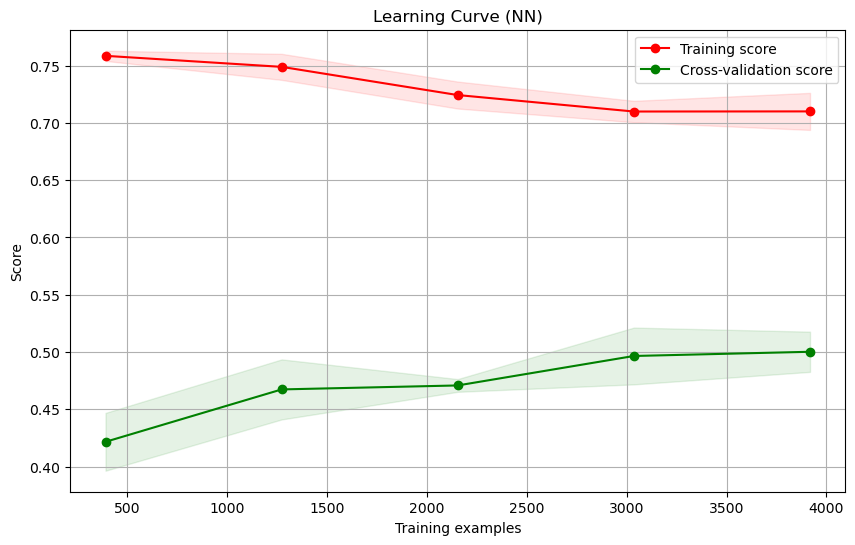

In [79]:
# Plot NN learning curves
plot_learning_curve(nn, "Learning Curve (NN)", features_scaled, target_variable, cv=5)
plt.show()

In [89]:
from sklearn.model_selection import StratifiedKFold

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create the neural network model
def create_nn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(features_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes for wine quality scores from 0 to 9
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_learning_curve_nn(model_fn, X, y, title, cv, epochs=50, batch_size=32):
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_scores = []
    test_scores = []
    
    for train_size in train_sizes:
        train_scores_fold = []
        test_scores_fold = []
        skf = StratifiedKFold(n_splits=cv)
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]
            
            X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
            
            model = model_fn()
            history = model.fit(X_train_subset, y_train_subset, epochs=epochs, batch_size=batch_size, verbose=0)
            
            train_score = model.evaluate(X_train_subset, y_train_subset, verbose=0)
            test_score = model.evaluate(X_val, y_val, verbose=0)
            
            train_scores_fold.append(train_score[1])
            test_scores_fold.append(test_score[1])
        
        train_scores.append(np.mean(train_scores_fold))
        test_scores.append(np.mean(test_scores_fold))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

cv = 5
plot_learning_curve_nn(create_nn_model, features_scaled, target_variable, "Learning Curve (Neural Network)", cv)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

### Using Autogluon to train, tune and deploy algorithm automatically